In [75]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, plot_confusion_matrix



In [11]:
train_data=pd.read_csv("Virufytrain.csv")

In [12]:
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]


In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


In [14]:
svm_model = SVC(kernel='linear')  
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [15]:
knn_model = KNeighborsClassifier(n_neighbors=5) 
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [16]:
ensemble_model = RandomForestClassifier(n_estimators=100, random_state=42)  
ensemble_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [56]:
test_data=pd.read_csv("Virufytest.csv")

In [57]:
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]


In [58]:
X_test_scaled = scaler.transform(X_test) 

In [62]:
knn_predictions = knn_model.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("KNN Accuracy:", knn_accuracy)


KNN Accuracy: 0.8648648648648649


In [63]:
ensemble_predictions = ensemble_model.predict(X_test_scaled)
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print("Ensemble Model (Random Forest) Accuracy:", ensemble_accuracy)

Ensemble Model (Random Forest) Accuracy: 0.8918918918918919


In [72]:
svm_precision = precision_score(y_test, svm_predictions, average='weighted')
svm_recall = recall_score(y_test, svm_predictions, average='weighted')
svm_f1 = f1_score(y_test, svm_predictions, average='weighted')

knn_precision = precision_score(y_test, knn_predictions, average='weighted')
knn_recall = recall_score(y_test, knn_predictions, average='weighted')
knn_f1 = f1_score(y_test, knn_predictions, average='weighted')

ensemble_precision = precision_score(y_test, ensemble_predictions, average='weighted')
ensemble_recall = recall_score(y_test, ensemble_predictions, average='weighted')
ensemble_f1 = f1_score(y_test, ensemble_predictions, average='weighted')

In [73]:
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)
knn_conf_matrix = confusion_matrix(y_test, knn_predictions)
ensemble_conf_matrix = confusion_matrix(y_test, ensemble_predictions)

In [74]:
print("SVM Evaluation Metrics:")
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1 Score:", svm_f1)
print("Confusion Matrix:\n", svm_conf_matrix)

print("\nKNN Evaluation Metrics:")
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1 Score:", knn_f1)
print("Confusion Matrix:\n", knn_conf_matrix)

print("\nEnsemble Model (Random Forest) Evaluation Metrics:")
print("Precision:", ensemble_precision)
print("Recall:", ensemble_recall)
print("F1 Score:", ensemble_f1)
print("Confusion Matrix:\n", ensemble_conf_matrix)

SVM Evaluation Metrics:
Precision: 0.8451308451308452
Recall: 0.8378378378378378
F1 Score: 0.8293328293328295
Confusion Matrix:
 [[23  1]
 [ 5  8]]

KNN Evaluation Metrics:
Precision: 0.8636036036036036
Recall: 0.8648648648648649
F1 Score: 0.8635410921125207
Confusion Matrix:
 [[22  2]
 [ 3 10]]

Ensemble Model (Random Forest) Evaluation Metrics:
Precision: 0.9073359073359073
Recall: 0.8918918918918919
F1 Score: 0.8862218862218861
Confusion Matrix:
 [[24  0]
 [ 4  9]]


In [76]:
plt.figure(figsize=(10, 5))

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

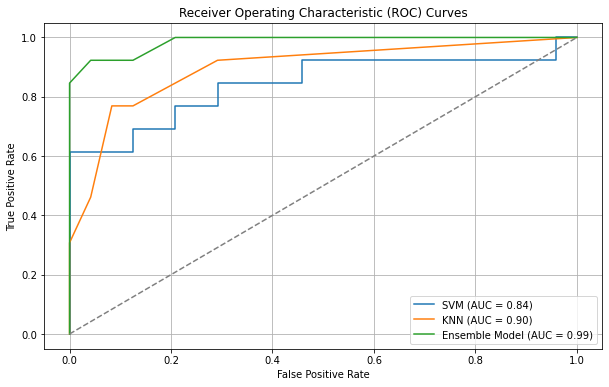

In [83]:
plt.figure(figsize=(10, 6))

svm_probs = svm_model.decision_function(X_test_scaled)
svm_fpr, svm_tpr, _ = roc_curve(y_test_encoded, svm_probs)
svm_auc = roc_auc_score(y_test_encoded, svm_probs)
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.2f})')

knn_probs = knn_model.predict_proba(X_test_scaled)[:, 1]
knn_fpr, knn_tpr, _ = roc_curve(y_test_encoded, knn_probs)
knn_auc = roc_auc_score(y_test_encoded, knn_probs)
plt.plot(knn_fpr, knn_tpr, label=f'KNN (AUC = {knn_auc:.2f})')

ensemble_probs = ensemble_model.predict_proba(X_test_scaled)[:, 1]
ensemble_fpr, ensemble_tpr, _ = roc_curve(y_test_encoded, ensemble_probs)
ensemble_auc = roc_auc_score(y_test_encoded, ensemble_probs)
plt.plot(ensemble_fpr, ensemble_tpr, label=f'Ensemble Model (AUC = {ensemble_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.grid(True)
plt.show()


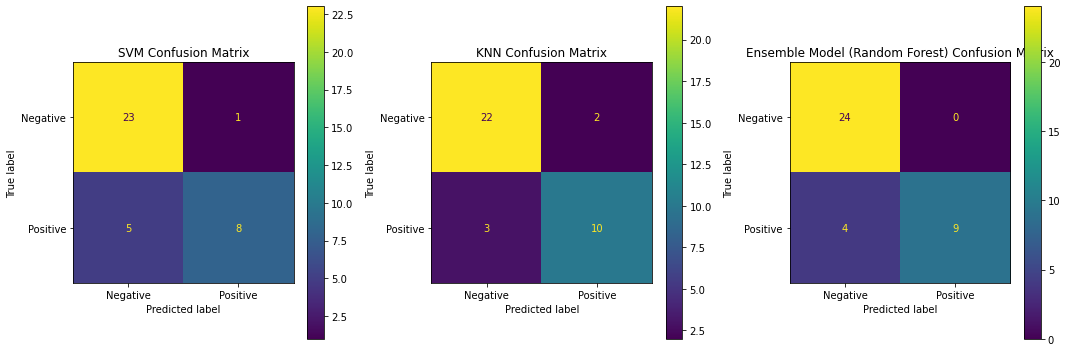

In [84]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

plot_confusion_matrix(svm_model, X_test_scaled, y_test, ax=axes[0])
axes[0].set_title('SVM Confusion Matrix')

plot_confusion_matrix(knn_model, X_test_scaled, y_test, ax=axes[1])
axes[1].set_title('KNN Confusion Matrix')

plot_confusion_matrix(ensemble_model, X_test_scaled, y_test, ax=axes[2])
axes[2].set_title('Ensemble Model (Random Forest) Confusion Matrix')

plt.tight_layout()
plt.show()
